In [130]:
import glob
import copy
from scipy.misc import imread
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi' : 100} #plotting pretty

#get our photo files
datadir = './data/*/Pano*/AP/*_*_*'
ph_files = glob.glob(datadir)

#extract subject IDs
subjects = copy.deepcopy(ph_files)
for i,fname in enumerate(subjects):
    subjects[i] = fname.split('/')[-4]

min image height: 653
min image width: 640


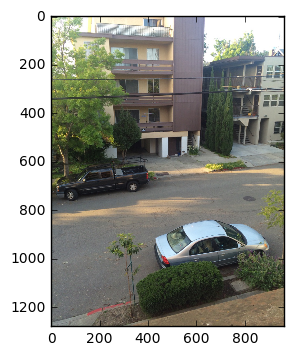

In [56]:
def read_ims(filelist):
    #read in images
    min_h = 10000
    min_w = 10000

    raws = []

    for pf in filelist:
        im = np.asarray(imread(pf))
        raws.append(im)
        #print(np.shape(im))
        #check width and height
        if(min_h) > np.shape(im)[0]:
            min_h = np.shape(im)[0]
        if(min_w) > np.shape(im)[1]:
            min_w = np.shape(im)[1]
    return(raws,min_h,min_w)

raw_images, min_h, min_w = read_ims(ph_files)
plt.imshow(raw_images[21])

print('min image height: {}'.format(min_h))
print('min image width: {}'.format(min_w))

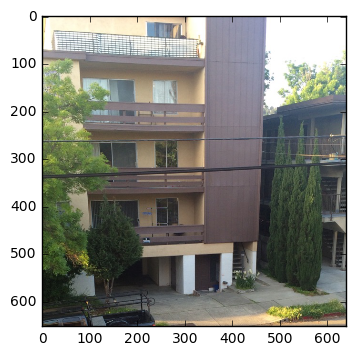

In [57]:
def cropims(ims,crop_h,crop_w,area):
    h_crop_h = np.int(crop_h/2)
    h_crop_w = np.int(crop_w/2)
    #newims = np.ones((np.shape(ims)[0],crop_h,crop_w,3))
    newims = []
    for i, im in enumerate(ims):
        #print(np.shape(im))
        im_h = np.shape(im)[0]
        im_w = np.shape(im)[1]
        h_im_h = np.int(im_h/2) #half image height
        h_im_w = np.int(im_w/2) #half image width
        if(area=='middle'):
            newim = im[h_im_h-h_crop_h:h_im_h+h_crop_h, #crop height
                       h_im_w-h_crop_w:h_im_w+h_crop_w, #crop width
                       :]
        elif(area=='top'):
             newim = im[0:crop_h, #crop height
                       h_im_w-h_crop_w:h_im_w+h_crop_w, #crop width
                       :]
        elif(area=='bottom'):
             newim = im[im_h-crop_h:im_h, #crop height
                       h_im_w-h_crop_w:h_im_w+h_crop_w, #crop width
                       :]
        else:
            raise ValueError('area not well specified!')
        #print(np.shape(newim))
        #newims[i,:,:,:] = newim
        newims.append(newim)
    return(newims)

images_middle = cropims(raw_images,min_h,min_w,'middle')
images_top = cropims(raw_images,min_h,min_w,'top')
images_bottom = cropims(raw_images,min_h,min_w,'bottom')

images = images_top

sim = images[21]
plt.imshow(sim)

(-0.5, 639.5, 652.5, -0.5)

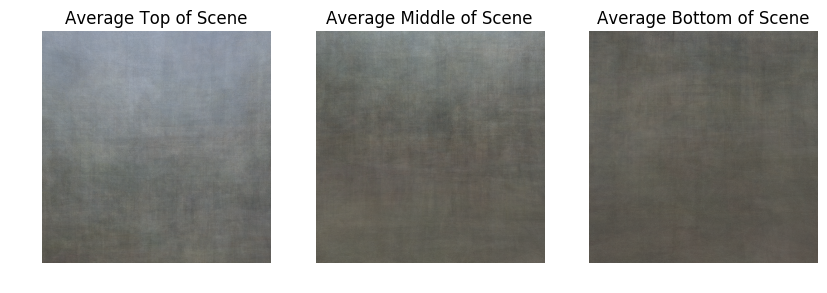

In [58]:
def avgims(ims):
    ims_arr = np.asarray(ims)
    #average images  - first index must be list of images
    avg = np.zeros_like(ims_arr[0])
    #print(np.shape(avg))
    for c in range(np.shape(avg)[2]): #loop over R, G, and B
        avg[:,:,c] = np.mean(ims_arr[:,:,:,c],axis=0)
    return(avg)

avgim = avgims(images)
avgim_top = avgims(images_top)
avgim_middle = avgims(images_middle)
avgim_bottom = avgims(images_bottom)

plt.figure(figsize=(10,3))

plt.subplot(1,3,1,title='Average Top of Scene')
plt.imshow(avgim_top)
plt.axis('off')
plt.subplot(1,3,2,title='Average Middle of Scene')
plt.imshow(avgim_middle)
plt.axis('off')
plt.subplot(1,3,3,title='Average Bottom of Scene')
plt.imshow(avgim_bottom)
plt.axis('off')

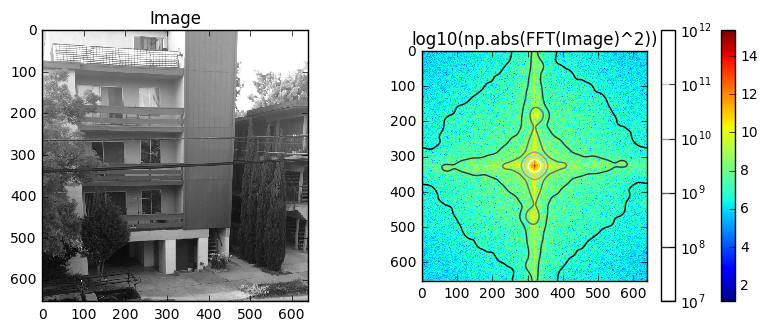

In [138]:
def spatialft(image):
    # Take the fourier transform of the image.
    # shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    greyavgim = np.mean(np.asarray(image),axis=2)
    ft = np.abs(np.fft.fftshift(np.fft.fft2(greyavgim)))
    ps = ft**2
    return(greyavgim, ft, ps)

image, ft2d, ps2d = spatialft(sim)

#2d power spectra
plt.figure(figsize=(10, 3.5))
#fig,axes=
plt.subplots(nrows=1,ncols=2,figsize =(10,3.5))

plt.subplot(1,2,1,title='Image')
plt.imshow(image, interpolation='none',cmap='gray')

plt.subplot(1,2,2,title='log10(np.abs(FFT(Image)^2))')
plt.imshow(np.log10(ps2d), interpolation='none')
#ls=np.linspace(np.min(ps2d),np.max(ps2d),10)
interp_ps2d = scipy.ndimage.filters.gaussian_filter(ps2d,10)
plt.colorbar()
plt.contour(interp_ps2d,cmap='gray',norm = mpl.colors.LogNorm())
plt.colorbar()

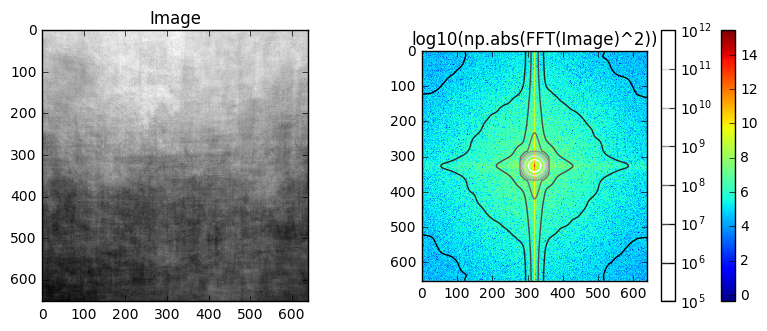

In [139]:
image, ft2d, ps2d = spatialft(avgim)

#2d power spectra
plt.figure(figsize=(10, 3.5))
#fig,axes=
plt.subplots(nrows=1,ncols=2,figsize =(10,3.5))

plt.subplot(1,2,1,title='Image')
plt.imshow(image, interpolation='none',cmap='gray')

plt.subplot(1,2,2,title='log10(np.abs(FFT(Image)^2))')
plt.imshow(np.log10(ps2d), interpolation='none')
#ls=np.linspace(np.min(ps2d),np.max(ps2d),10)
interp_ps2d = scipy.ndimage.filters.gaussian_filter(ps2d,10)
plt.colorbar()
plt.contour(interp_ps2d,cmap='gray',norm = mpl.colors.LogNorm())
plt.colorbar()

In [88]:
np.max(np.log10(ps2d))

15.364512526393396